In [32]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import random as rd
from sklearn import neighbors
import sklearn
import time
from sklearn.cluster import KMeans

start=time.time()

mat = scipy.io.loadmat('mnist-original.mat') # lecture du fichier
data = np.transpose(mat['data'])
label = np.transpose(mat['label'])
X = [data[i].reshape(28,28) for i in range(len(data)) ] # on créé une nouvelle liste qui va contenir nos matrices 28x28

def index_chiffre(n, y):  # elle nous renvoie un tableau contenant les indices représentants le chiffre n
    return [i for i in range(len(y)) if y[i]==n] 

def image_moyenne(n, X, y): # cette fonction renvoie la matrice moyenne (centroïde) pour le chiffre n
    index = index_chiffre(n, y) 
    sum_matrice = np.zeros((28,28)) # la matrice qui sera utilisée dans la somme
    for i in index:
        sum_matrice += X[i] # on somme toutes les matrices représentants le chiffre n
    return sum_matrice/len(index)

def distance(x,y,k): # fonction qui calcule la distance entre deux matrices 
    x = x.reshape(len(x)**2) # x est une matrice carré de "longueur" n donc sa représentation en vecteur sera de taille n*n
    y = y.reshape(len(y)**2)
    return np.linalg.norm(x-y,k)

def prediction(x,centroide, n, k,h):# on va chercher le centroïde le plus proche de la matrice X_n où n est l'indice de la matrice
    l=[distance(x[n], centroide[i],k) for i in range(10*h)]
    k= l.index(min(l))
    z=k%h
    return float((k-z)/h)

def calcul_pourcentage(n,h):# renvoie le pourcentage de reussite n représente l'ordre de la norme qu'on va choisir
    prediction_l = [ prediction(X_test,centroide_train, i, n,h) for i in range(len(X_test)) ]
    A =[i for i,j in zip(y_test,prediction_l) if i==j]
    return(len(A)*100/len(X_test))


X_train, X_test, y_train, y_test = train_test_split(X,label,test_size=0.2,random_state=59)

prediction(X_test,centroide_train,1,3,i)

end=time.time()
print(end-start)

0.21414756774902344


In [41]:
np.shape(data)

(70000, 784)

In [49]:
Presque_Nouveau_X = [np.reshape(X_train[i],(784,)) for i in range(len(X_train))] 
Nouveau_X = np.array(Presque_Nouveau_X)

In [50]:
type(Nouveau_X)
np.shape(Nouveau_X)

(56000, 784)

In [51]:
def centro(nombre):
    chiffres = range(10)
    nb_clusters = nombre
    centre_=[]
    for j,t in zip(range(len(chiffres)),chiffres):
        idx = np.where((y_train == t))[0]
        Xk = np.array(Nouveau_X)[idx]    
        Ykk = np.array(y_train)[idx]
        Yk = np.reshape(Ykk, (len(Ykk),))
        kmeans = sklearn.cluster.KMeans(n_clusters=nb_clusters).fit(Xk,Yk)
        centroidk = kmeans.cluster_centers_
        for i in range(nb_clusters):
            centre_.append(centroidk[i])
    return centre_

In [52]:
nombre=61
opo=[]
for i in range(2,nombre):
    centr=centro(i)
    centroide_train = [centr[j].reshape(28,28) for j in range(10*i)]
    opo.append(calcul_pourcentage(3,i))

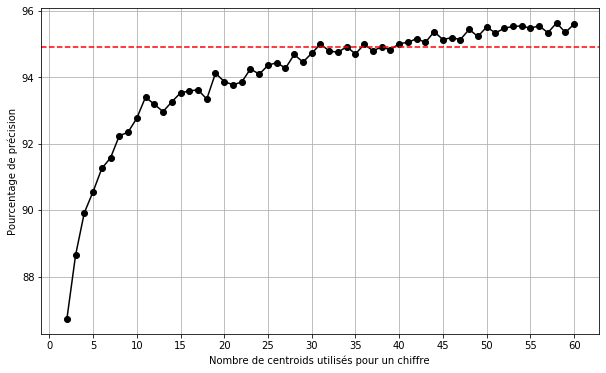

In [56]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot([i+2 for i in range(len(opo))],opo, '-o', c='black')
ax.axhline(y=94.92, ls='--' ,c='red')
ax.set_xlabel('Nombre de centroids utilisés pour un chiffre ')
ax.set_xticks(list(range(0,nombre,5)))
ax.yaxis.set_ticks_position('left')
ax.set_ylabel('Pourcentage de précision')
ax.grid()
plt.show()

Pour 60 centroïdes :

2.0
0.08200788497924805


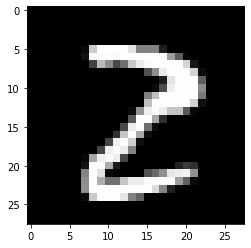

In [74]:
start = time.time()
print(prediction(X_test,centroide_train,700,3,i))
end = time.time()
print(end-start)
plt.imshow(X_test[700],cmap = 'gray')

Pourcentage pour 60 centroides = 95,07%

Meilleur pourcentage atteint pour 58 centroides = 95,64

temps pris pour 60 centroides pour une prédiciton = entre 0.07 et 0.09 secondes